In [2]:
import numpy as np
import pandas as pd
import keras

In [3]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().values.all()

False

In [5]:
X = df.iloc[:,3:].drop('Exited',axis=1)
y = df['Exited']
X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [6]:
geography = pd.get_dummies(X['Geography'],drop_first=True,dtype=float)
gender = pd.get_dummies(X['Gender'],drop_first=True,dtype=float)


In [7]:
X = pd.concat([X,geography,gender],axis=1)
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0.0,0.0,1.0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0.0,0.0,1.0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,0.0,0.0,0.0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1.0,0.0,1.0


In [8]:
X = X.drop(['Geography','Gender'],axis=1)

In [9]:
X

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0.0,0.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0.0,1.0,0.0
2,502,42,8,159660.80,3,1,0,113931.57,0.0,0.0,0.0
3,699,39,1,0.00,2,0,0,93826.63,0.0,0.0,0.0
4,850,43,2,125510.82,1,1,1,79084.10,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0.0,0.0,1.0
9996,516,35,10,57369.61,1,1,1,101699.77,0.0,0.0,1.0
9997,709,36,7,0.00,1,0,1,42085.58,0.0,0.0,0.0
9998,772,42,3,75075.31,2,1,0,92888.52,1.0,0.0,1.0


In [10]:
# split data into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
print(x_train.shape,x_test.shape,y_train.shape)

(8000, 11) (2000, 11) (8000,)


## Make the ANN 
importing the keras packages and libraries

Sequencial library = It is used to create a neural network

Dense layer = To create a hidden layer in the neural network

LaekyReLU, ReLU, ELU = they are the Actication Functions

Dropuot = it is a regularization technique.

In [12]:
import os
os.environ["KERAS_BACKEND"] = "jax"
import keras

In [13]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, ReLU, ELU
from tensorflow.keras.layers import Dropout

In [14]:
tf.config.run_functions_eagerly(True)

In [15]:
tf.data.experimental.enable_debug_mode()

In [33]:
classifier = Sequential()
# Adding the input layer and first hidden layer
#classifier.add(Dense(units = 6,kernel_initializer='he_uniform',activation=ReLU,input_dim = 11))
model = Sequential([
    Dense(16, input_dim=X_train.shape[1],kernel_initializer='he_uniform', activation='relu'),
    Dense(8,kernel_initializer='he_uniform', activation='relu'),
    Dense(1,kernel_initializer='he_uniform', activation='sigmoid')
])

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# ADding second hidden layer into neural network
#classifier.add(Dense(units=6, kernel_initializer='he_uniform',activation=ReLU))

In [35]:
# Adding output layer to neural network
#classifier.add(Dense(units=1,kernel_initializer='he_uniform',activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 337 (1.32 KB)

 Trainable params: 337 (1.32 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# compiling the ANN
model_history = model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

## Fitting the ANN to the training set

In [40]:
model1 =model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=5)

Epoch 1/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 23s 43ms/step - accuracy: 0.7956 - loss: 0.4948 - val_accuracy: 0.8005 - val_loss: 0.4566
Epoch 2/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 24s 44ms/step - accuracy: 0.7987 - loss: 0.4466 - val_accuracy: 0.8050 - val_loss: 0.4379
Epoch 3/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 28s 52ms/step - accuracy: 0.8039 - loss: 0.4298 - val_accuracy: 0.8035 - val_loss: 0.4280
Epoch 4/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 23s 44ms/step - accuracy: 0.8152 - loss: 0.4151 - val_accuracy: 0.8058 - val_loss: 0.4189
Epoch 5/5
536/536 ━━━━━━━━━━━━━━━━━━━━ 27s 51ms/step - accuracy: 0.8209 - loss: 0.4049 - val_accuracy: 0.8209 - val_loss: 0.4101


In [52]:
print(model1.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


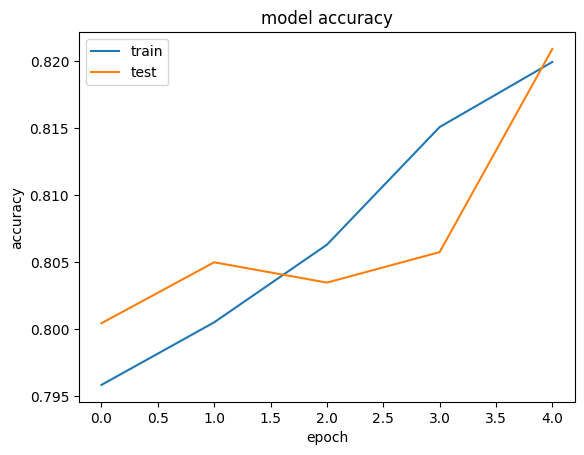

In [53]:
import matplotlib.pyplot as plt
plt.plot(model1.history['accuracy'])
plt.plot(model1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

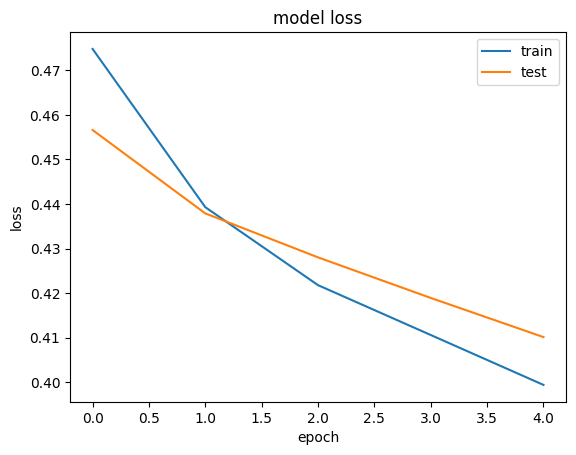

In [54]:
plt.plot(model1.history['loss'])
plt.plot(model1.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [55]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1573,   22],
       [ 316,   89]], dtype=int64)

In [57]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score*100

83.1